In [68]:
from numpy.random import randn
import numpy as np
import pandas as pd
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D 

plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 10
%matplotlib inline

In [81]:
planes = pd.read_csv('data/planes.csv', low_memory=False)
planes = planes[planes['YEAR MANUFACTURED'] <= '2015']
flights = pd.read_csv('data/flights.csv', low_memory=False, usecols=['TAIL_NUMBER','ARRIVAL_DELAY'])

In [82]:
def cleanManufacturer(row, val1, val2):
    if(row['MANUFACTURER'].strip() == val1):
        return val2
    else:
        return row['MANUFACTURER']

In [83]:
planes['MANUFACTURER'] = planes['MANUFACTURER'].apply(lambda x: x.strip())
planes['MANUFACTURER'] = planes.apply(cleanManufacturer, args=('EMBRAER S A','EMBRAER'), axis=1)
planes['MANUFACTURER'] = planes.apply(cleanManufacturer, args=('MCDONNELL DOUGLAS CORPORATION','MCDONNELL DOUGLAS'), axis=1)
planes['MANUFACTURER'] = planes.apply(cleanManufacturer, args=('MCDONNELL DOUGLAS AIRCRAFT CO','MCDONNELL DOUGLAS'), axis=1)
planes['MANUFACTURER'] = planes.apply(cleanManufacturer, args=('AIRBUS INDUSTRIE','AIRBUS'), axis=1)
planes['MANUFACTURER'] = planes.apply(cleanManufacturer, args=('BOMBARDIER INC','BOMBARDIER'), axis=1)

In [105]:
planes.head()

,TAIL_NUMBER,YEAR MANUFACTURED,MANUFACTURER,MODEL,NO-ENG,NO-SEATS
0,N407AS,2012,BOEING,737-990ER,2,222
1,N171US,2001,AIRBUS,A321-211,2,199
2,N527AS,,BOEING,737-890,2,149
3,N3730B,2000,BOEING,737-832,2,189
4,N635NK,2014,AIRBUS,A320-232,2,200


In [85]:
merge = pd.merge(flights,planes,on='TAIL_NUMBER')

In [86]:
def display_mean_arrival_delay(source,groupby,mincount,title,sortby,color):
    df = pd.DataFrame(source[[groupby,'ARRIVAL_DELAY']].groupby([groupby]).agg(['mean', 'count']).reset_index())
    df.columns = df.columns.get_level_values(0)
    df.columns = [groupby,title,'COUNT']
    df = df.query('COUNT>'+mincount)
    df = df.sort_values(by=sortby)
    df = df.set_index(groupby)
    df.plot(kind='bar', figsize=(20, 10), title=title + ' by ' + groupby, y=title,color=color)
    return df;

,MEAN ARRIVAL DELAY,COUNT
MODEL,,
737-732,-3.364537,8685
737-890,-3.351326,66064
737-932ER,-3.282371,51489
A319-114,-1.727102,73687
A320-212,-1.665735,52967
...,...,...
737-3L9,12.885783,3721
A330-323,13.552347,1662
767-323,14.633323,3259


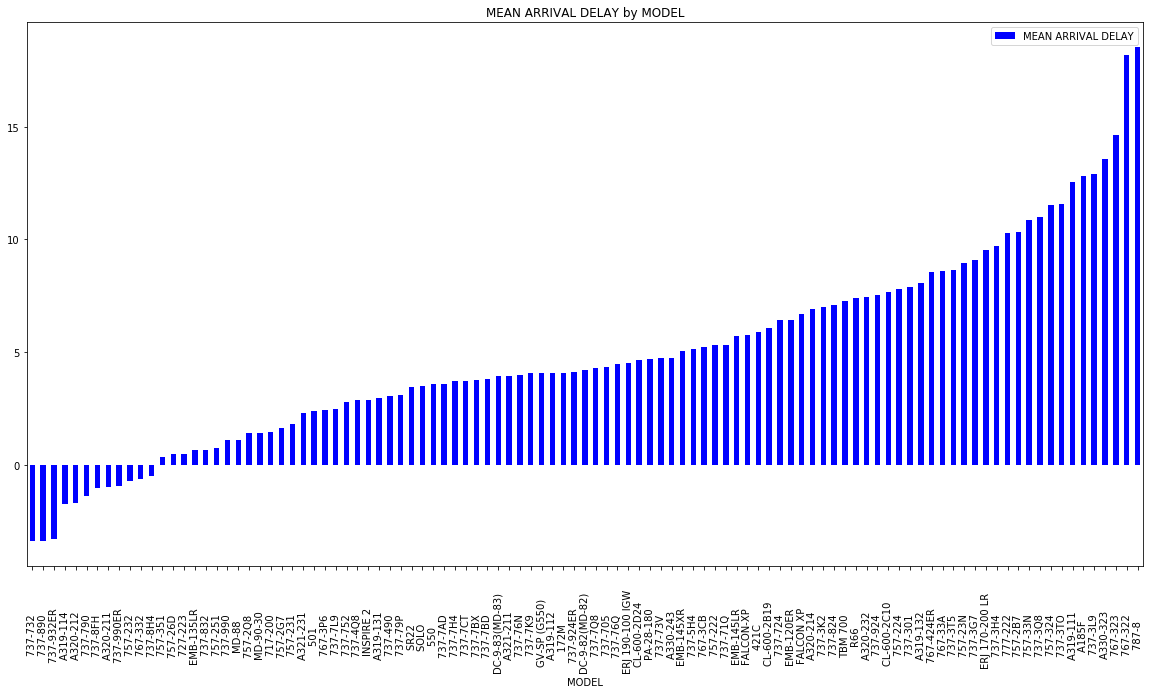

In [96]:
display_mean_arrival_delay(merge,'MODEL','1000','MEAN ARRIVAL DELAY','MEAN ARRIVAL DELAY','blue')

,MEAN ARRIVAL DELAY,COUNT
MANUFACTURER,,
MCDONNELL DOUGLAS,1.639332,312151
BOEING,3.330418,2180463
AIRBUS,4.842855,1045812
EMBRAER,5.438904,498109
BOMBARDIER,6.324503,719800


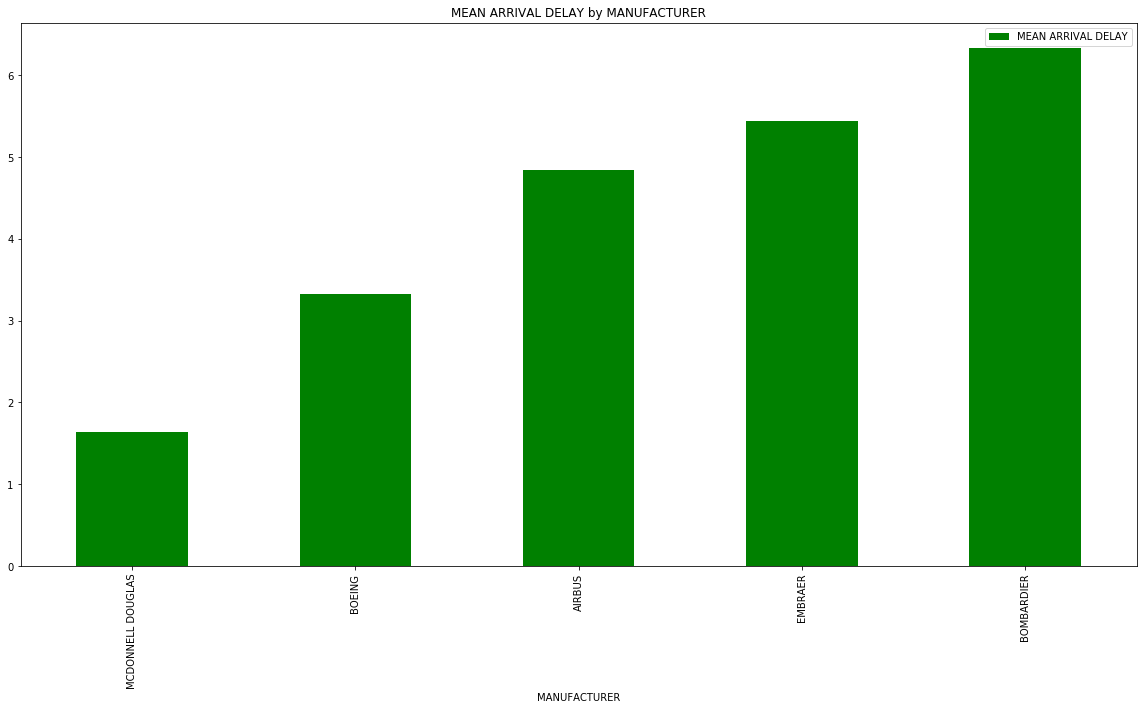

In [98]:
display_mean_arrival_delay(merge,'MANUFACTURER','10000','MEAN ARRIVAL DELAY','MEAN ARRIVAL DELAY','green')

,MEAN ARRIVAL DELAY,COUNT
YEAR MANUFACTURED,,
,4.358912,130996
1987,2.565098,30961
1988,3.575546,54060
1989,1.927107,44545
1990,1.418970,59071
...,...,...
2011,4.467717,104063
2012,3.258056,121241
2013,2.846434,131305


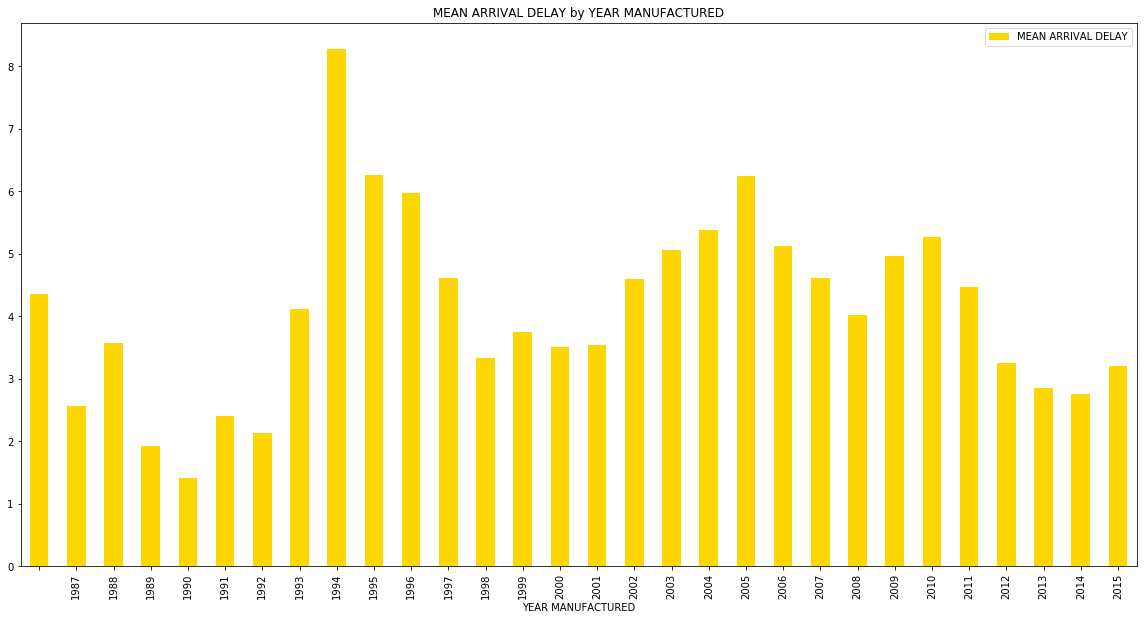

In [89]:
display_mean_arrival_delay(merge,'YEAR MANUFACTURED','10000','MEAN ARRIVAL DELAY','YEAR MANUFACTURED','gold')

,MEAN ARRIVAL DELAY,COUNT
NO-SEATS,,
21,0.325581,344
22,1.986379,1762
32,5.705181,7798
37,0.658164,11722
55,5.815810,716521
...,...,...
422,18.272425,602
442,24.980769,52
450,16.962825,269


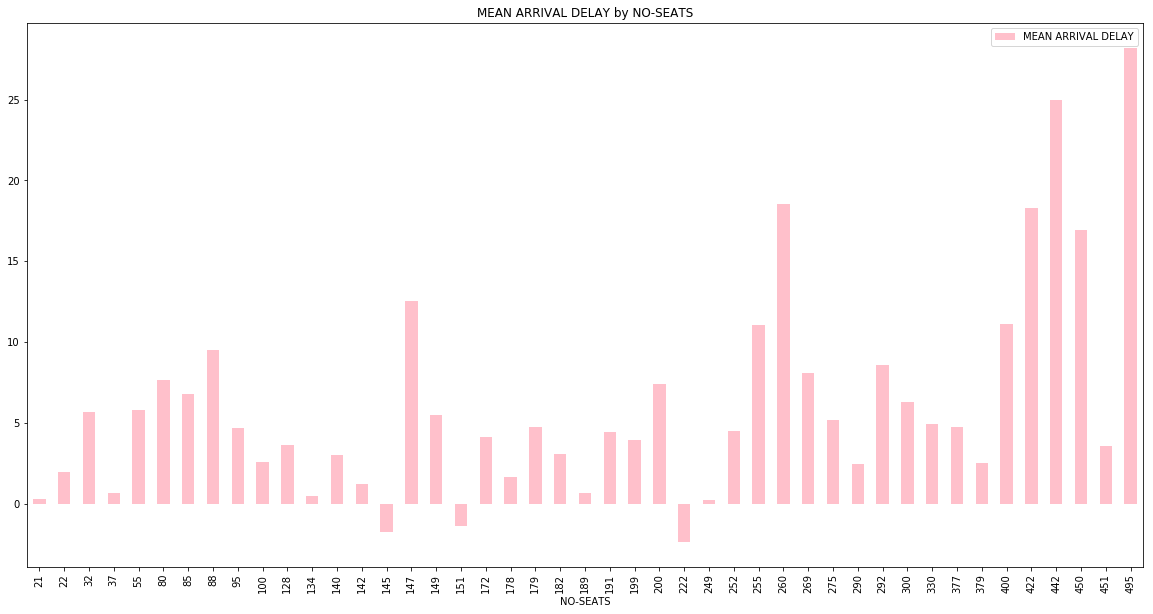

In [90]:
display_mean_arrival_delay(merge[merge['NO-SEATS'] > 20],'NO-SEATS','0','MEAN ARRIVAL DELAY', 'NO-SEATS','pink')

,MEAN ARRIVAL DELAY,COUNT
NO-ENG,,
1,4.626305,18582
2,4.228506,4772365
3,1.496346,1779
4,5.123336,3681


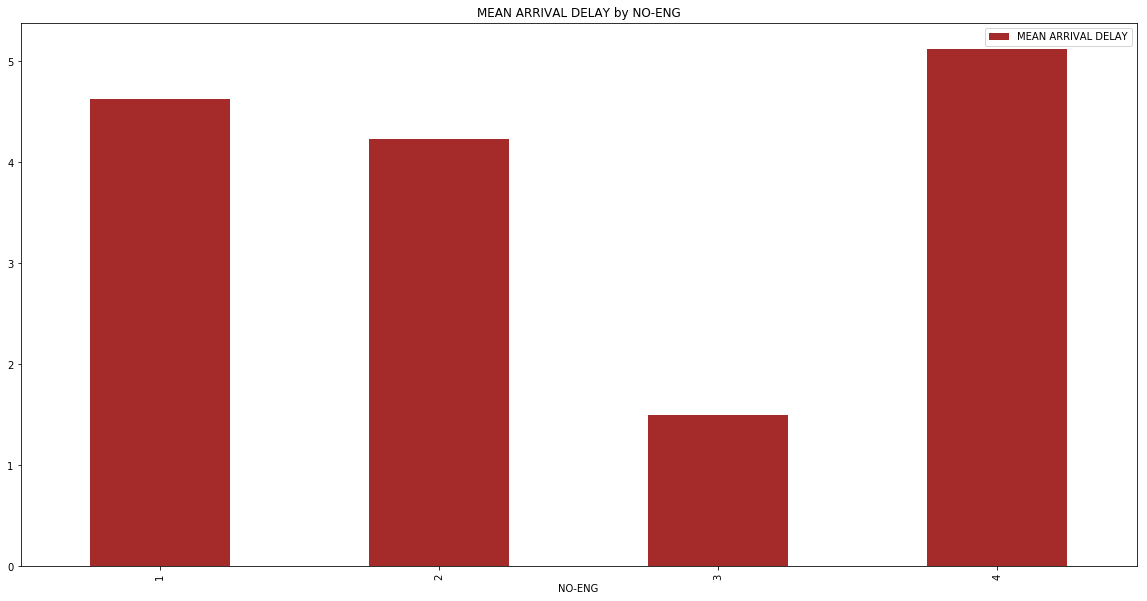

In [91]:
display_mean_arrival_delay(merge,'NO-ENG','0','MEAN ARRIVAL DELAY', 'NO-ENG','brown')

,,
MANUFACTURER,MEAN ARRIVAL DELAY,COUNT
BOMBARDIER,6.324503,719800
EMBRAER,5.438904,498109
AIRBUS,4.842855,1045812
BOEING,3.330418,2180463
MCDONNELL DOUGLAS,1.639332,312151


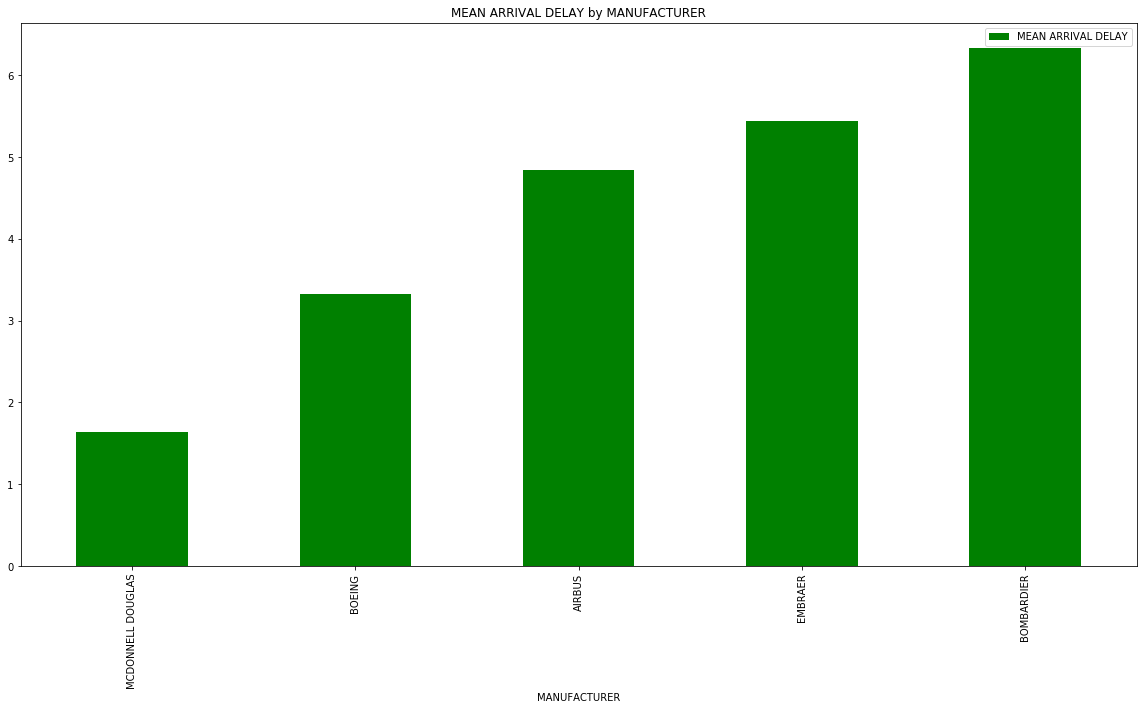

In [93]:
#temp = display_mean_arrival_delay(merge,'MANUFACTURER','10000','MEAN ARRIVAL DELAY','MEAN ARRIVAL DELAY','green')
#df2 = temp.copy(True) 
#df2.sort_values(by=['MEAN ARRIVAL DELAY'],ascending=False, inplace=True)
#df2 = df2.reset_index()
#df2 = df2.set_index(['MANUFACTURER','MEAN ARRIVAL DELAY','COUNT'])
#df2